<a href="https://colab.research.google.com/github/neizalazo/pneumonia/blob/main/pneumonia_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pneumonia Detection Challenge**
##Leveraging AI for Improved Pneumonia Detection


### **Project Overview**
The RSNA Pneumonia Detection Challenge hosted on Kaggle (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview) aimed to develop an algorithm capable of detecting pneumonia from chest X-ray images. Pneumonia is a severe lung infection that affects millions of people worldwide, often leading to severe illness and mortality if not diagnosed and treated promptly. The challenge dataset comprises thousands of chest X-ray images labeled for the presence of pneumonia, providing an opportunity to develop machine learning models for accurate pneumonia detection.

### **Impact and Significance**
Pneumonia is a leading cause of morbidity and mortality globally, especially among children and the elderly. Early and accurate detection of pneumonia from medical images can significantly improve patient outcomes by enabling timely intervention and treatment. Machine learning models trained on chest X-ray images have the potential to assist healthcare professionals in diagnosing pneumonia more efficiently, particularly in resource-constrained settings where access to expert radiologists may be limited.
### **Approach and Technique**
The chosen approach for this project is Convolutional Neural Networks (CNNs), a type of deep learning algorithm well-suited for image classification tasks. CNNs are particularly effective in capturing spatial hierarchies and patterns within images, making them highly suitable for medical image analysis. This implementation uses a modified version of the ResNet-18 architecture as the backbone CNN model. ResNet-18 is a popular CNN architecture known for its depth and efficiency in learning feature representations from images.



### **Code Breakdown**

#### 1. Data Loading and Preprocessing
- **Install and import libraries**:

  DICOM Format: DICOM (Digital Imaging and Communications in Medicine) is the standard format for medical imaging data, including X-rays, CT scans, and MRIs. It stores the image data and metadata such as patient information, imaging parameters, and study details.






In [1]:
## Necessary installations
!pip install opencv-python
!pip install pydicom
!pip install torchmetrics
!pip install pytorch_lightning
!pip install torch --extra-index-url https://download.pytorch.org/whl/cu116

## Importing libraries
from pathlib import Path  # Imported for path manipulation
import pydicom  # For reading DICOM files
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt #plots
import os
import cv2  # For image processing
import pandas as pd  # For handling data frames
import matplotlib.pyplot as plt  # For plotting
from tqdm.notebook import tqdm  # For progress bars
import torch  # For deep learning
print(torch.cuda.is_available()) #Check if cuda is being used
import torchvision  # For computer vision tasks
from torchvision import transforms  # For image transformations
import torchmetrics  # For evaluation metrics
import pytorch_lightning as pl  # For lightning framework
from pytorch_lightning.callbacks import ModelCheckpoint  # For model checkpointing
from pytorch_lightning.loggers import TensorBoardLogger  # For logging
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 989.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 722.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

- **Download Data**:

  - Importing the data from the RSNA Pneumonia Detection Challenge hosted on Kaggle (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview)

In [ ]:
## copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle
!kaggle competitions download -c rsna-pneumonia-detection-challenge
!unzip rsna-pneumonia-detection-challenge.zip

# Loading data
train_labels_df = pd.read_csv("/content/stage_2_train_labels.csv")  # Load CSV data

# Removing duplicate entries
train_labels_df = train_labels_df.drop_duplicates("patientId")  # Drop duplicate patient IDs

# Define paths
train_img_path = Path("/content/stage_2_train_images/")  # Root directory for images
train_img_prc_path = Path("/content/train_img_prc/")  # Directory to save processed images

print("Number of Images after removing duplicates:", len(train_labels_df))


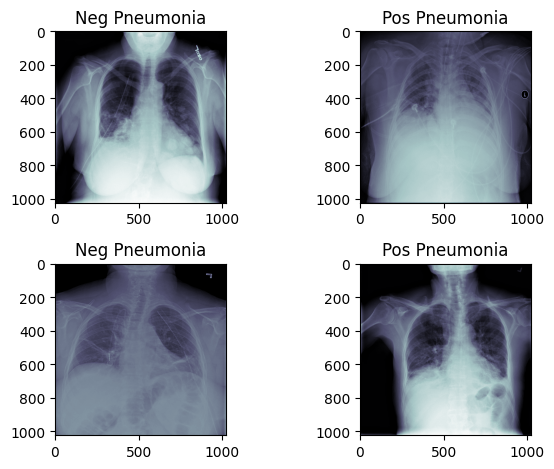

In [14]:
#Plot sample images from data set
nrow = 2
ncol = 2
fig, axis = plt.subplots(nrow, ncol)  # Create subplots for image display
counter_label_0 = 0  # Counter for iterating through images with label 0
counter_label_1 = 0  # Counter for iterating through images with label 1

for i in range(nrow):  # Loop over rows
    for j in range(ncol):  # Loop over columns
        if (i * ncol + j) % 2 == 0:  # Check if the index is even (for label 0)
            patient_id = train_labels_df[train_labels_df['Target'] == 0].iloc[counter_label_0]['patientId']  # Get patient ID with label 0
            counter_label_0 += 1  # Increment counter for label 0
        else:
            patient_id = train_labels_df[train_labels_df['Target'] == 1].iloc[counter_label_1]['patientId']  # Get patient ID with label 1
            counter_label_1 += 1  # Increment counter for label 1

        dcm_path = train_img_path / patient_id  # Get path to DICOM file
        dcm_path = dcm_path.with_suffix(".dcm")  # Change extension to .dcm
        dcm = pydicom.read_file(dcm_path).pixel_array  # Read DICOM file and extract pixel array

        label = train_labels_df[train_labels_df['patientId'] == patient_id]['Target'].values[0]  # Get label
        label_text = 'Pos Pneumonia' if label == 1 else 'Neg Pneumonia'  # Set label text based on the label
        axis[i, j].imshow(dcm, cmap="bone")  # Display image
        axis[i, j].set_title(label_text)  # Set title as label text

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot


- **Data Preprocessing**:
  - **Normalization Significance**: Normalizing pixel values to a range of [0, 1] improves model convergence and performance by ensuring that gradients are within a manageable range during backpropagation. This prevents the saturation of activation functions and accelerates learning.
  - **Image Resizing**: Resizing images to a fixed dimension (e.g., 224x224) standardizes input dimensions across images, facilitating efficient batch processing and using pre-trained models that expect specific input sizes.
  - **Define Datasets**: Separate dataset in training and validation folders.

In [4]:
#Separate train images in training and validation data sets. This data set already contains a folder with test images.
train_lb_df, val_lb_df = train_test_split(train_labels_df, test_size=0.3, random_state=2000)

# Preprocessing and saving images
sum_pixels = 0  # Variable to store sum of pixel values
sum_pixels_sq = 0  # Variable to store sum of squared pixel values
for counter, patient_id in enumerate(tqdm(train_labels_df.patientId)):  # Iterate over patient IDs with progress bar
    dcm_path = train_img_path / patient_id  # Get path to DICOM file
    dcm_path = dcm_path.with_suffix(".dcm")  # Change extension to .dcm
    dcm = pydicom.read_file(dcm_path).pixel_array / 255  # Read DICOM file, normalize pixel value
    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)  # Resize image to (224, 224) and convert to float16

    label = train_labels_df.Target.iloc[counter]  # Get label

    train_or_val = "training" if patient_id in train_lb_df['patientId'].values else "validation" # Determine whether data is for training or validation

    save_train_img_prc_path = train_img_prc_path / train_or_val / str(label)  # Define path to save processed image
    save_train_img_prc_path.mkdir(parents=True, exist_ok=True)  # Create directories if they don't exist
    np.save(save_train_img_prc_path / patient_id, dcm_array)  # Save processed image

    #Now we want to get the mean and std so we can use it during normalization transforms later.
    norm_transform = dcm_array.shape[0] * dcm_array.shape[1]  # Compute normalization factor
    if train_or_val == "training":  # If data is for training
        sum_pixels += np.sum(dcm_array) / norm_transform  # Compute sum of pixel values
        sum_pixels_sq += (np.power(dcm_array, 2).sum()) / norm_transform  # Compute sum of squared pixel values

train_mean = sum_pixels / len(train_lb_df)  # Compute mean of pixel values
train_std = np.sqrt(sum_pixels_sq / len(train_lb_df) - (train_mean**2))  # Compute standard deviation of pixel values

print(f"Training Mean: {train_mean}, Training STD: {train_std}")  # Print mean and standard deviation

  0%|          | 0/26684 [00:00<?, ?it/s]

Training Mean: 0.4907262083680215, Training STD: 0.24783184275165893


-  Lets look at the sample counts after training and validation split of Normal and Pneumonia cases.

            Normal  Pneumonia
Training     14416       4262
Validation    6256       1750


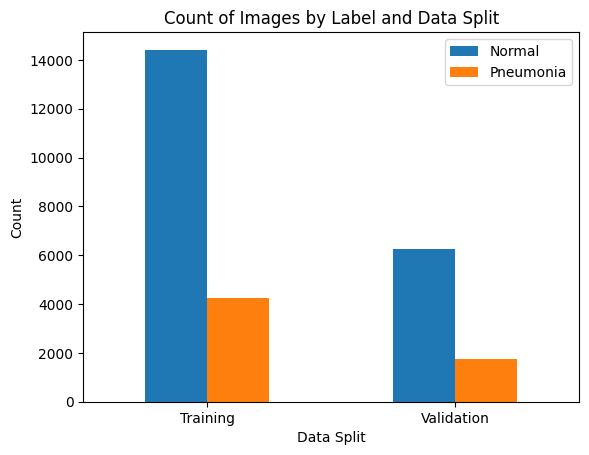

In [5]:
# Count of images in each folder
training_0_count = len(os.listdir("/content/train_img_prc/training/0"))
training_1_count = len(os.listdir("/content/train_img_prc/training/1"))
validation_0_count = len(os.listdir("/content/train_img_prc/validation/0"))
validation_1_count = len(os.listdir("/content/train_img_prc/validation/1"))

# Create DataFrame
data = {
    'Normal': [training_0_count, validation_0_count ],
    'Pneumonia': [training_1_count, validation_1_count]
}
df = pd.DataFrame(data, index=['Training', 'Validation'])
print(df)

#Plot data split
df.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Data Split')
plt.ylabel('Count')
plt.title('Count of Images by Label and Data Split')
plt.show()

- **Data Transformations**: Defines transformations for both training and validation datasets, including conversion to tensor, normalization, and augmentation for training data.

In [6]:
# Define data transforms
train_transforms = transforms.Compose([  # Define transformations for training data
    transforms.ToTensor(),  # Convert image to tensor
    transforms.CenterCrop(224),  # Apply resized crop
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(train_mean, train_std),  # Normalize image
    transforms.RandomAffine(translate=(0.05,0.05), degrees=0),  # Apply random affine transformation
])

val_transforms = transforms.Compose([  # Define transformations for validation data
   transforms.ToTensor(),  # Convert image to tensor
   transforms.CenterCrop(224),  # Apply resized crop
   transforms.Normalize(train_mean, train_std),  # Normalize image
])

- **Custom DataLoader Function**: Defines a function to load numpy files containing preprocessed images.


In [7]:
# Custom DataLoader function
def load_file(path):  # Function to load numpy file
    return np.load(path).astype(np.float32)  # Load and return numpy file as float32

# Define datasets
train_dataset = torchvision.datasets.DatasetFolder(  # Define training dataset
    "train_img_prc/training/",  # Path to training data
    loader=load_file, extensions="npy", transform=train_transforms)  # Use custom loader and transformations

val_dataset = torchvision.datasets.DatasetFolder(  # Define validation dataset
    "train_img_prc/validation/",  # Path to validation data
    loader=load_file, extensions="npy", transform=val_transforms)  # Use custom loader and transformations

# Define DataLoader parameters
batch_size = 64  # Batch size for DataLoader
num_workers = 0  # Number of CPU workers for DataLoader (set to 0 for GPU)

# Create DataLoader instances
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)  # Create DataLoader for training data
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)  # Create DataLoader for validation data


#### 2. Model Definition
- **Loss Function and Optimizer**:
  - **Loss Function Explanation**: A loss function quantifies the model's prediction error during training by comparing predicted outputs with ground-truth labels. It guides the optimization process by providing a measure of the model's performance. Binary Cross-Entropy Loss with logits is preferred for binary classification tasks as it effectively penalizes misclassifications and produces stable gradients during training.
  - **Optimizer Significance**: An optimizer adjusts the model's parameters (e.g., weights) during training to minimize the loss function. Choosing an appropriate optimizer impacts convergence speed and final performance by determining the direction and magnitude of parameter updates. Adam optimizer is chosen for its adaptive learning rate capabilities, which can lead to faster convergence and better generalization.




In [8]:
# Model definition
class PneumoniaModel(pl.LightningModule):  # Define PneumoniaModel class inheriting from LightningModule
    def __init__(self, weight=3):  # Constructor
        super().__init__()  # Call superclass constructor

        self.model = torchvision.models.resnet18(pretrained=True)  # Load pre-trained ResNet18 model
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Modify first convolutional layer
        self.model.fc = torch.nn.Sequential(torch.nn.Dropout(0.5), torch.nn.Linear(512, 1)) #fully connected layer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)  # Define optimizer
        self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight]))  # Define loss function

        self.train_f1 = torchmetrics.F1Score(task="BINARY")  # Define f1score metric for training
        self.val_f1 = torchmetrics.F1Score(task="BINARY")  # Define f1score metric for validation

    def forward(self, data):  # Forward pass method
        pred = self.model(data)  # Forward pass through the model
        return pred  # Return predictions

    def training_step(self, batch, batch_idx):  # Training step method
        x_ray, label = batch  # Unpack batch
        label = label.float()  # Convert label to float
        pred = self(x_ray)[:,0]  # Get model predictions
        loss = self.loss_fn(pred, label)  # Compute loss

        self.log("Train Loss", loss)  # Log training loss
        self.log("Step Train F1", self.train_f1(torch.sigmoid(pred), label.int()))  # Log training f1score
        return loss  # Return loss

    def on_train_epoch_end(self):  # Method executed at the end of each training epoch
        self.log("Train F1", self.train_f1.compute())  # Log training f1score

    def validation_step(self, batch, batch_idx):  # Validation step method
        x_ray, label = batch  # Unpack batch
        label = label.float()  # Convert label to float
        pred = self(x_ray)[:,0]  # Get model predictions
        loss = self.loss_fn(pred, label)  # Compute loss

        self.log("Val Loss", loss)  # Log validation loss
        self.log("Step Val F1", self.val_f1(torch.sigmoid(pred), label.int()))  # Log validation f1score

    def on_validation_epoch_end(self):  # Method executed at the end of each validation epoch
        self.log("Val F1", self.val_f1.compute())  # Log validation f1score

    def configure_optimizers(self):  # Method to configure optimizers
        return [self.optimizer]  # Return optimizer



#### 3. Training
- **Training Loop**:
  - **Epochs Selection**: Training is conducted over 35 epochs, allowing the model to learn complex patterns from the data over multiple passes iteratively. Each epoch represents one complete iteration through the entire dataset.
- **Metrics**: F1 score is chosen as the metric for training evaluation due to its ability to balance precision and recall, especially in imbalanced datasets like medical image classification.


In [9]:
# Model instantiation
model = PneumoniaModel()  # Create an instance of PneumoniaModel

# Checkpoint callback
checkpoint_callback = ModelCheckpoint(  # Define model checkpoint callback
    monitor='Val F1',  # Monitor validation f1score
    save_top_k=10,  # Save top 10 models
    mode='max')  # Save based on maximum validation f1score

# Trainer configuration
gpus = 1  # Number of GPUs to use (set to 1 for Google Colab GPU)
trainer = pl.Trainer(logger=TensorBoardLogger(save_dir="./logs"), log_every_n_steps=1,  # Define Lightning Trainer
                     callbacks=checkpoint_callback, max_epochs=35, devices="auto", accelerator="gpu")  # Pass logger, callbacks, max epochs, and number of GPUs

# Train the model
trainer.fit(model, train_loader, val_loader)  # Train the model using the provided data loaders
# Copy checkpoints to drive so they are not deleted when google colab session ends
!rm ./drive/MyDrive/DataScience/Capstone/checkpoints/*
!mv ./logs/lightning_logs/version_0/checkpoints/* ./drive/MyDrive/DataScience/Capstone/checkpoints/

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 83.9MB/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.ut

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=35` reached.


#### 4. Evaluation
Once trained, the model is evaluated on a separate validation dataset to assess its performance. Various evaluation metrics such as accuracy, precision, recall, and F1-score are computed to gauge the model's effectiveness in pneumonia detection.

  - **Accuracy**: Accuracy measures the proportion of correctly predicted samples out of all samples. In this project, accuracy reflects the overall correctness of pneumonia detection predictions.
  - **Precision**: Precision quantifies the proportion of true positive predictions among all positive predictions. It indicates the model's ability to avoid false positives, i.e., correctly identifying pneumonia cases.
  - **Recall**: Recall calculates the proportion of true positive predictions among all actual positive cases. It assesses the model's ability to detect all pneumonia cases without missing any (i.e., minimizing false negatives).
  - **F1 Score**: The F1 score is the harmonic mean of precision and recall, balancing the two metrics. It considers both false positives and false negatives and is suitable for evaluating models on imbalanced datasets, such as this pneumonia detection task.

In [10]:
### Model Results with weighted loss


checkpoint_folder = "./drive/MyDrive/DataScience/Capstone/checkpoints/"

for file_name in os.listdir(checkpoint_folder):
    if file_name.endswith(".ckpt"):  # Check if the file is a checkpoint file
        checkpoint_path = os.path.join(checkpoint_folder, file_name)

        # Load the trained model
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = PneumoniaModel.load_from_checkpoint(checkpoint_path)
        model.eval()
        model.to(device)

        # Evaluate the model
        preds = []
        labels = []

        with torch.no_grad():
            for data, label in tqdm(val_dataset):
                data = data.to(device).float().unsqueeze(0)
                pred = torch.sigmoid(model(data)[0].cpu())
                preds.append(pred)
                labels.append(label)

        preds = torch.tensor(preds)
        labels = torch.tensor(labels).int()

        # Compute evaluation metrics
        acc = torchmetrics.Accuracy(task="BINARY")(preds, labels)
        precision = torchmetrics.Precision(task="BINARY")(preds, labels)
        recall = torchmetrics.Recall(task="BINARY")(preds, labels)
        f1score = torchmetrics.F1Score(task="BINARY")(preds, labels)
        cm = torchmetrics.ConfusionMatrix(task="binary", num_classes=2)(preds, labels)

        # Print evaluation metrics
        print(f"Checkpoint: {checkpoint_path}")
        print(f"Val Accuracy: {acc}")
        print(f"Val Precision: {precision}")
        print(f"Val Recall: {recall}")
        print(f"Val F1Score: {f1score}")
        print(f"Confusion Matrix:\n {cm}")
# end of loop



  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=25-step=7592.ckpt
Val Accuracy: 0.818885862827301
Val Precision: 0.57170170545578
Val Recall: 0.6834285855293274
Val F1Score: 0.6225923895835876
Confusion Matrix:
 tensor([[5360,  896],
        [ 554, 1196]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=26-step=7884.ckpt
Val Accuracy: 0.7960279583930969
Val Precision: 0.5231683254241943
Val Recall: 0.7548571228981018
Val F1Score: 0.6180117130279541
Confusion Matrix:
 tensor([[5052, 1204],
        [ 429, 1321]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=27-step=8176.ckpt
Val Accuracy: 0.7954034209251404
Val Precision: 0.5218238234519958
Val Recall: 0.7651428580284119
Val F1Score: 0.6204819083213806
Confusion Matrix:
 tensor([[5029, 1227],
        [ 411, 1339]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=28-step=8468.ckpt
Val Accuracy: 0.7990257143974304
Val Precision: 0.529265284538269
Val Recall: 0.7285714149475098
Val F1Score: 0.6131281852722168
Confusion Matrix:
 tensor([[5122, 1134],
        [ 475, 1275]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=33-step=9928.ckpt
Val Accuracy: 0.7961528897285461
Val Precision: 0.5237138271331787
Val Recall: 0.7445714473724365
Val F1Score: 0.6149126887321472
Confusion Matrix:
 tensor([[5071, 1185],
        [ 447, 1303]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=34-step=10220.ckpt
Val Accuracy: 0.7879090905189514
Val Precision: 0.5100775361061096
Val Recall: 0.7519999742507935
Val F1Score: 0.6078522205352783
Confusion Matrix:
 tensor([[4992, 1264],
        [ 434, 1316]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=29-step=8760.ckpt
Val Accuracy: 0.8003997206687927
Val Precision: 0.5305221080780029
Val Recall: 0.7548571228981018
Val F1Score: 0.623113214969635
Confusion Matrix:
 tensor([[5087, 1169],
        [ 429, 1321]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=30-step=9052.ckpt
Val Accuracy: 0.8070197105407715
Val Precision: 0.5445071458816528
Val Recall: 0.7165714502334595
Val F1Score: 0.6188008785247803
Confusion Matrix:
 tensor([[5207, 1049],
        [ 496, 1254]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=31-step=9344.ckpt
Val Accuracy: 0.7935298681259155
Val Precision: 0.5194544792175293
Val Recall: 0.7400000095367432
Val F1Score: 0.6104171872138977
Confusion Matrix:
 tensor([[5058, 1198],
        [ 455, 1295]])


  0%|          | 0/8006 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=32-step=9636.ckpt
Val Accuracy: 0.7431926131248474
Val Precision: 0.451551616191864
Val Recall: 0.8148571252822876
Val F1Score: 0.581092119216919
Confusion Matrix:
 tensor([[4524, 1732],
        [ 324, 1426]])


### **Conclusion**
In conclusion, this project demonstrates the application of deep learning techniques, specifically CNNs, for pneumonia detection from chest X-ray images. By leveraging state-of-the-art algorithms and methodologies, machine learning models can play a vital role in helping healthcare professionals diagnose and manage pneumonia more effectively, ultimately leading to improved patient care and outcomes.